# Salary of Full Stack by country by years of experience

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv('./data/developer_survey_2019/survey_results_public.csv')

In [3]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

## Drop NA

In [4]:
ddf = df[['ConvertedComp', 'Country', 'YearsCodePro', 'DevType']].dropna(how='any')

## Drop all years of experience except 1-5 years

In [5]:
ddf = ddf[ddf['YearsCodePro'] != 'Less than 1 year']
ddf = ddf[ddf['YearsCodePro'] != 'More than 50 years']
ddf['YearsCodePro'] = pd.to_numeric(ddf['YearsCodePro'])
ddf = ddf[ddf['YearsCodePro'] <= 5]
print(len(ddf))
ddf.head()

24530


,ConvertedComp,Country,YearsCodePro,DevType
2,8820.0,Thailand,1,"Designer;Developer, back-end;Developer, front-..."
5,366420.0,Canada,3,Data or business analyst;Data scientist or mac...
8,95179.0,New Zealand,4,"Database administrator;Developer, back-end;Dev..."
13,57060.0,Germany,2,"Developer, desktop or enterprise applications"
15,455352.0,United Kingdom,3,"Developer, full-stack"


## Drop everything except Full Stack Developer Role

In [6]:
ddf = ddf[ddf['DevType'].str.contains('full')]
print(len(ddf))
ddf.head()

13137


,ConvertedComp,Country,YearsCodePro,DevType
2,8820.0,Thailand,1,"Designer;Developer, back-end;Developer, front-..."
8,95179.0,New Zealand,4,"Database administrator;Developer, back-end;Dev..."
15,455352.0,United Kingdom,3,"Developer, full-stack"
16,65277.0,Australia,2,"Developer, back-end;Developer, front-end;Devel..."
19,41244.0,Lithuania,4,"Database administrator;Designer;Developer, bac..."


## Whitelist countries

In [7]:
def whitelist_and_plot(dddf, country_whitelist):
    # Filter by countries
    countries = dddf[dddf['Country'].str.contains('|'.join(country_whitelist))]
    
    # Find median
    median_result = countries.groupby(['Country', 'YearsCodePro']).median()
    median_result = median_result.reset_index()
    
    # Group by country and years of exp
    result_with_index = median_result.set_index('YearsCodePro')
    grouped_with_index = result_with_index.groupby('Country')
    
    # Plot
    grouped_with_index['ConvertedComp'].plot(legend=True, ylabel='compensation USD')

## Plots

### Scandinavia

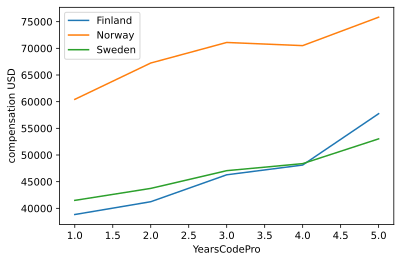

In [8]:
scandinavian_countries = [
    'Norway',
    'Sweden',
    'Finland',
]
whitelist_and_plot(ddf, scandinavian_countries)

### Europe

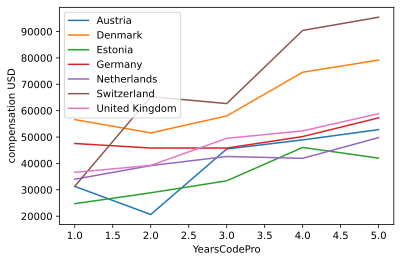

In [9]:
european_countries = [
    'Netherlands',
    'Denmark',
    'United Kingdom',
    'Austria',
    'Switzerland',
    'Germany',
    'Estonia'
]
whitelist_and_plot(ddf, european_countries)

### Other

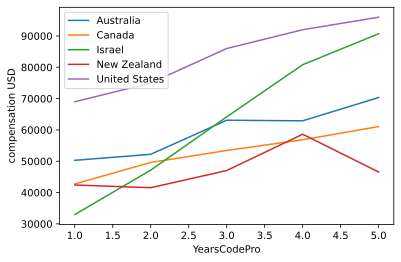

In [10]:
other = [
    'United States',
    'Canada',
    'Australia',
    'Israel',
    'New Zealand',
]
whitelist_and_plot(ddf, other)

### Asian

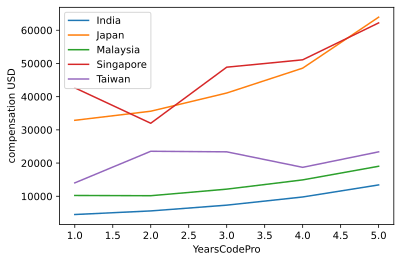

In [11]:
asian = [
    'India',
    'Singapore',
    'Malaysia',
    'Taiwan',
    'Japan'
]
whitelist_and_plot(ddf, asian)

## Conclusion

Expect 75k-100k in USA and 45k-55k EUR in Europe and fuck Asia. 

Estonia looks bad on paper, but their taxes are really low (21%). 30k EUR is pretty good. While Germany has 42% tax.
